# Data Preprocessing

## Load Dataset

In [1]:
import pandas as pd

# Load the dataset from CSV file

df = pd.read_csv("apple_quality.csv")

# Remove the string value from the Acidity column
df = df[df['Acidity'] != 'Created_by_Nidula_Elgiriyewithana']

# Turn Acidity column into a float
df['Acidity'] = pd.to_numeric(df['Acidity'])

# Display column names, non-null count, and data type
# Display row count and column count
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


(4000, 9)

## Original Data Distribution

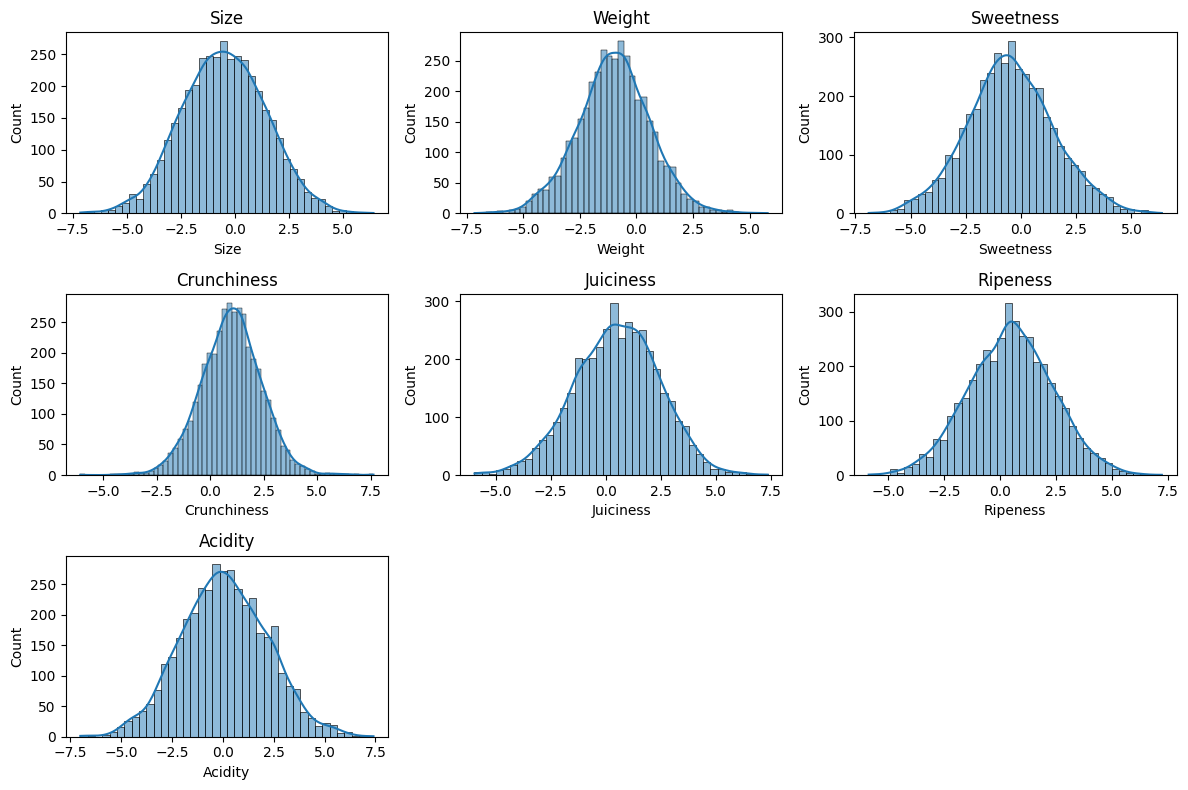


mean:
Size          -0.503015
Weight        -0.989547
Sweetness     -0.470479
Crunchiness    0.985478
Juiciness      0.512118
Ripeness       0.498277
Acidity        0.076877
dtype: float64 , 
median:
Size          -0.513703
Weight        -0.984736
Sweetness     -0.504758
Crunchiness    0.998249
Juiciness      0.534219
Ripeness       0.503445
Acidity        0.022609
dtype: float64 , 
std:
 Size           1.928059
Weight         1.602507
Sweetness      1.943441
Crunchiness    1.402757
Juiciness      1.930286
Ripeness       1.874427
Acidity        2.110270
dtype: float64


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for all the features, exclude A_id because it is not relevant 
features_to_plot = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

#print the mean, median, and standard deviation for each of the features
print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(df[features_to_plot].mean() , df[features_to_plot].median(), df[features_to_plot].std()))

## Boxplot of All Features

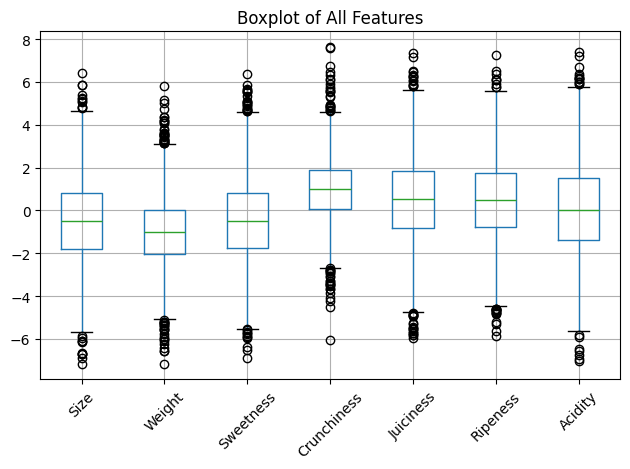

In [3]:
# Use the boxplot method to plot all seven features, this can show any outliers in the features
df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']].boxplot()
plt.title("Boxplot of All Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Finding Outliers using IQR Method

In [4]:
# Compute the IQR Q1, Q2, Q3, IQR, min and max.
X = df.loc[:, ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
Q1 = X.quantile(0.25)
Q2 = X.quantile(0.5)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
min = X.min()
max = X.max()

print("\nQ1:\n{} , \nQ2:\n{} , \nQ3:\n{} , \nIQR:\n{} , \nmin:\n{} , \nmax:\n{}".format(Q1, Q2, Q3, IQR, min, max))

# print out the number outliers that were found
outliers = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))
print("\nOutliers:\n", outliers.sum())


Q1:
Size          -1.816765
Weight        -2.011770
Sweetness     -1.738425
Crunchiness    0.062764
Juiciness     -0.801286
Ripeness      -0.771677
Acidity       -1.377424
Name: 0.25, dtype: float64 , 
Q2:
Size          -0.513703
Weight        -0.984736
Sweetness     -0.504758
Crunchiness    0.998249
Juiciness      0.534219
Ripeness       0.503445
Acidity        0.022609
Name: 0.5, dtype: float64 , 
Q3:
Size           0.805526
Weight         0.030976
Sweetness      0.801922
Crunchiness    1.894234
Juiciness      1.835976
Ripeness       1.766212
Acidity        1.510493
Name: 0.75, dtype: float64 , 
IQR:
Size           2.622291
Weight         2.042747
Sweetness      2.540347
Crunchiness    1.831470
Juiciness      2.637262
Ripeness       2.537889
Acidity        2.887917
dtype: float64 , 
min:
Size          -7.151703
Weight        -7.149848
Sweetness     -6.894485
Crunchiness   -6.055058
Juiciness     -5.961897
Ripeness      -5.864599
Acidity       -7.010538
dtype: float64 , 
max:
Size   

## Calculating Lower and Upper Limit for Determining Outliers

In [5]:
# Calculate the boundaries for each feature
def boundaries(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    print(feature)
    print(lower_limit, upper_limit)
    outliers = df[(df[feature] < lower_limit) | (df[feature] > upper_limit)]
    #print(outliers)

# Find the boundaries for the 7 features
for i in df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]:
    boundaries(df, i)

Size
-5.75020099175 4.73896291425
Weight
-5.075890391874999 3.0950965391249996
Sweetness
-5.54894553775 4.61244239625
Crunchiness
-2.6844403373750003 4.641438949625
Juiciness
-4.7571791193749995 5.791869691624999
Ripeness
-4.578509627375 5.573044401624999
Acidity
-5.7092993302499995 5.84236800775


## Removing Outliers

In [6]:
# function for removing outliers
def remove_outliers(df, features):
    # Initialize a mask that starts as all True
    mask = pd.Series([True] * len(df))

    # Find the lower and upper limits for each feature
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        # Update the mask to exclude outliers for the current feature
        mask &= (df[feature] >= lower_limit) & (df[feature] <= upper_limit)

    # Return the DataFrame without outliers
    return df[mask]

# Define the features
features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Get the cleaned DataFrame
cleaned_df = remove_outliers(df, features)

# Display the number of rows the cleaned dataframe has
cleaned_df.info()

# Display how many outliers were removed
outliers_removed = len(df) - len(cleaned_df)
print("Total rows removed:", outliers_removed)


<class 'pandas.core.frame.DataFrame'>
Index: 3790 entries, 1 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         3790 non-null   float64
 1   Size         3790 non-null   float64
 2   Weight       3790 non-null   float64
 3   Sweetness    3790 non-null   float64
 4   Crunchiness  3790 non-null   float64
 5   Juiciness    3790 non-null   float64
 6   Ripeness     3790 non-null   float64
 7   Acidity      3790 non-null   float64
 8   Quality      3790 non-null   object 
dtypes: float64(8), object(1)
memory usage: 296.1+ KB
Total rows removed: 210


## Boxplot after Removing Outliers

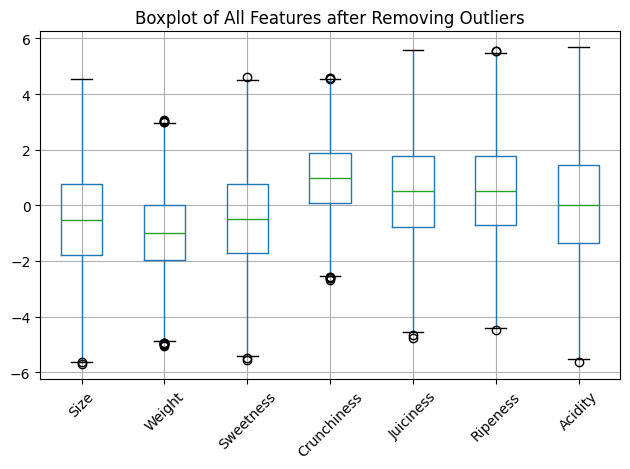

In [7]:
# Use the boxplot method to plot all numeric features
cleaned_df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']].boxplot()
plt.title("Boxplot of All Features after Removing Outliers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Feature Distributions After Removing Outliers

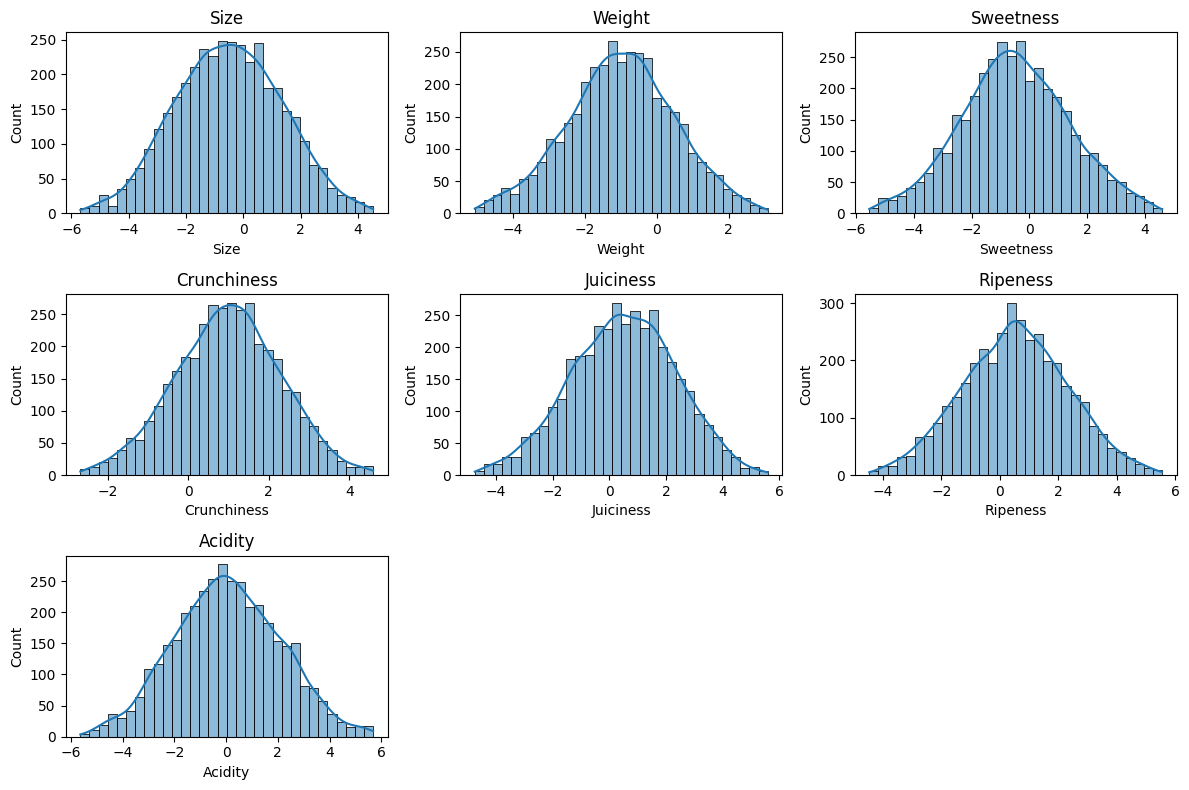


mean:
Size          -0.511357
Weight        -0.987773
Sweetness     -0.479110
Crunchiness    0.985224
Juiciness      0.499397
Ripeness       0.529009
Acidity        0.057943
dtype: float64 , 
median:
Size          -0.514732
Weight        -0.979754
Sweetness     -0.505682
Crunchiness    0.996911
Juiciness      0.509553
Ripeness       0.528713
Acidity        0.014117
dtype: float64 , 
std:
 Size           1.850336
Weight         1.497196
Sweetness      1.871642
Crunchiness    1.298640
Juiciness      1.851270
Ripeness       1.803875
Acidity        2.047036
dtype: float64


In [8]:
# Plot histograms for all the features, exclude A_id because it is not relevant 
features_to_plot = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(cleaned_df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

#print the mean, median, and standard deviation for each of the features
print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(cleaned_df[features_to_plot].mean() , cleaned_df[features_to_plot].median(), cleaned_df[features_to_plot].std()))

# EDA

## Pairplot

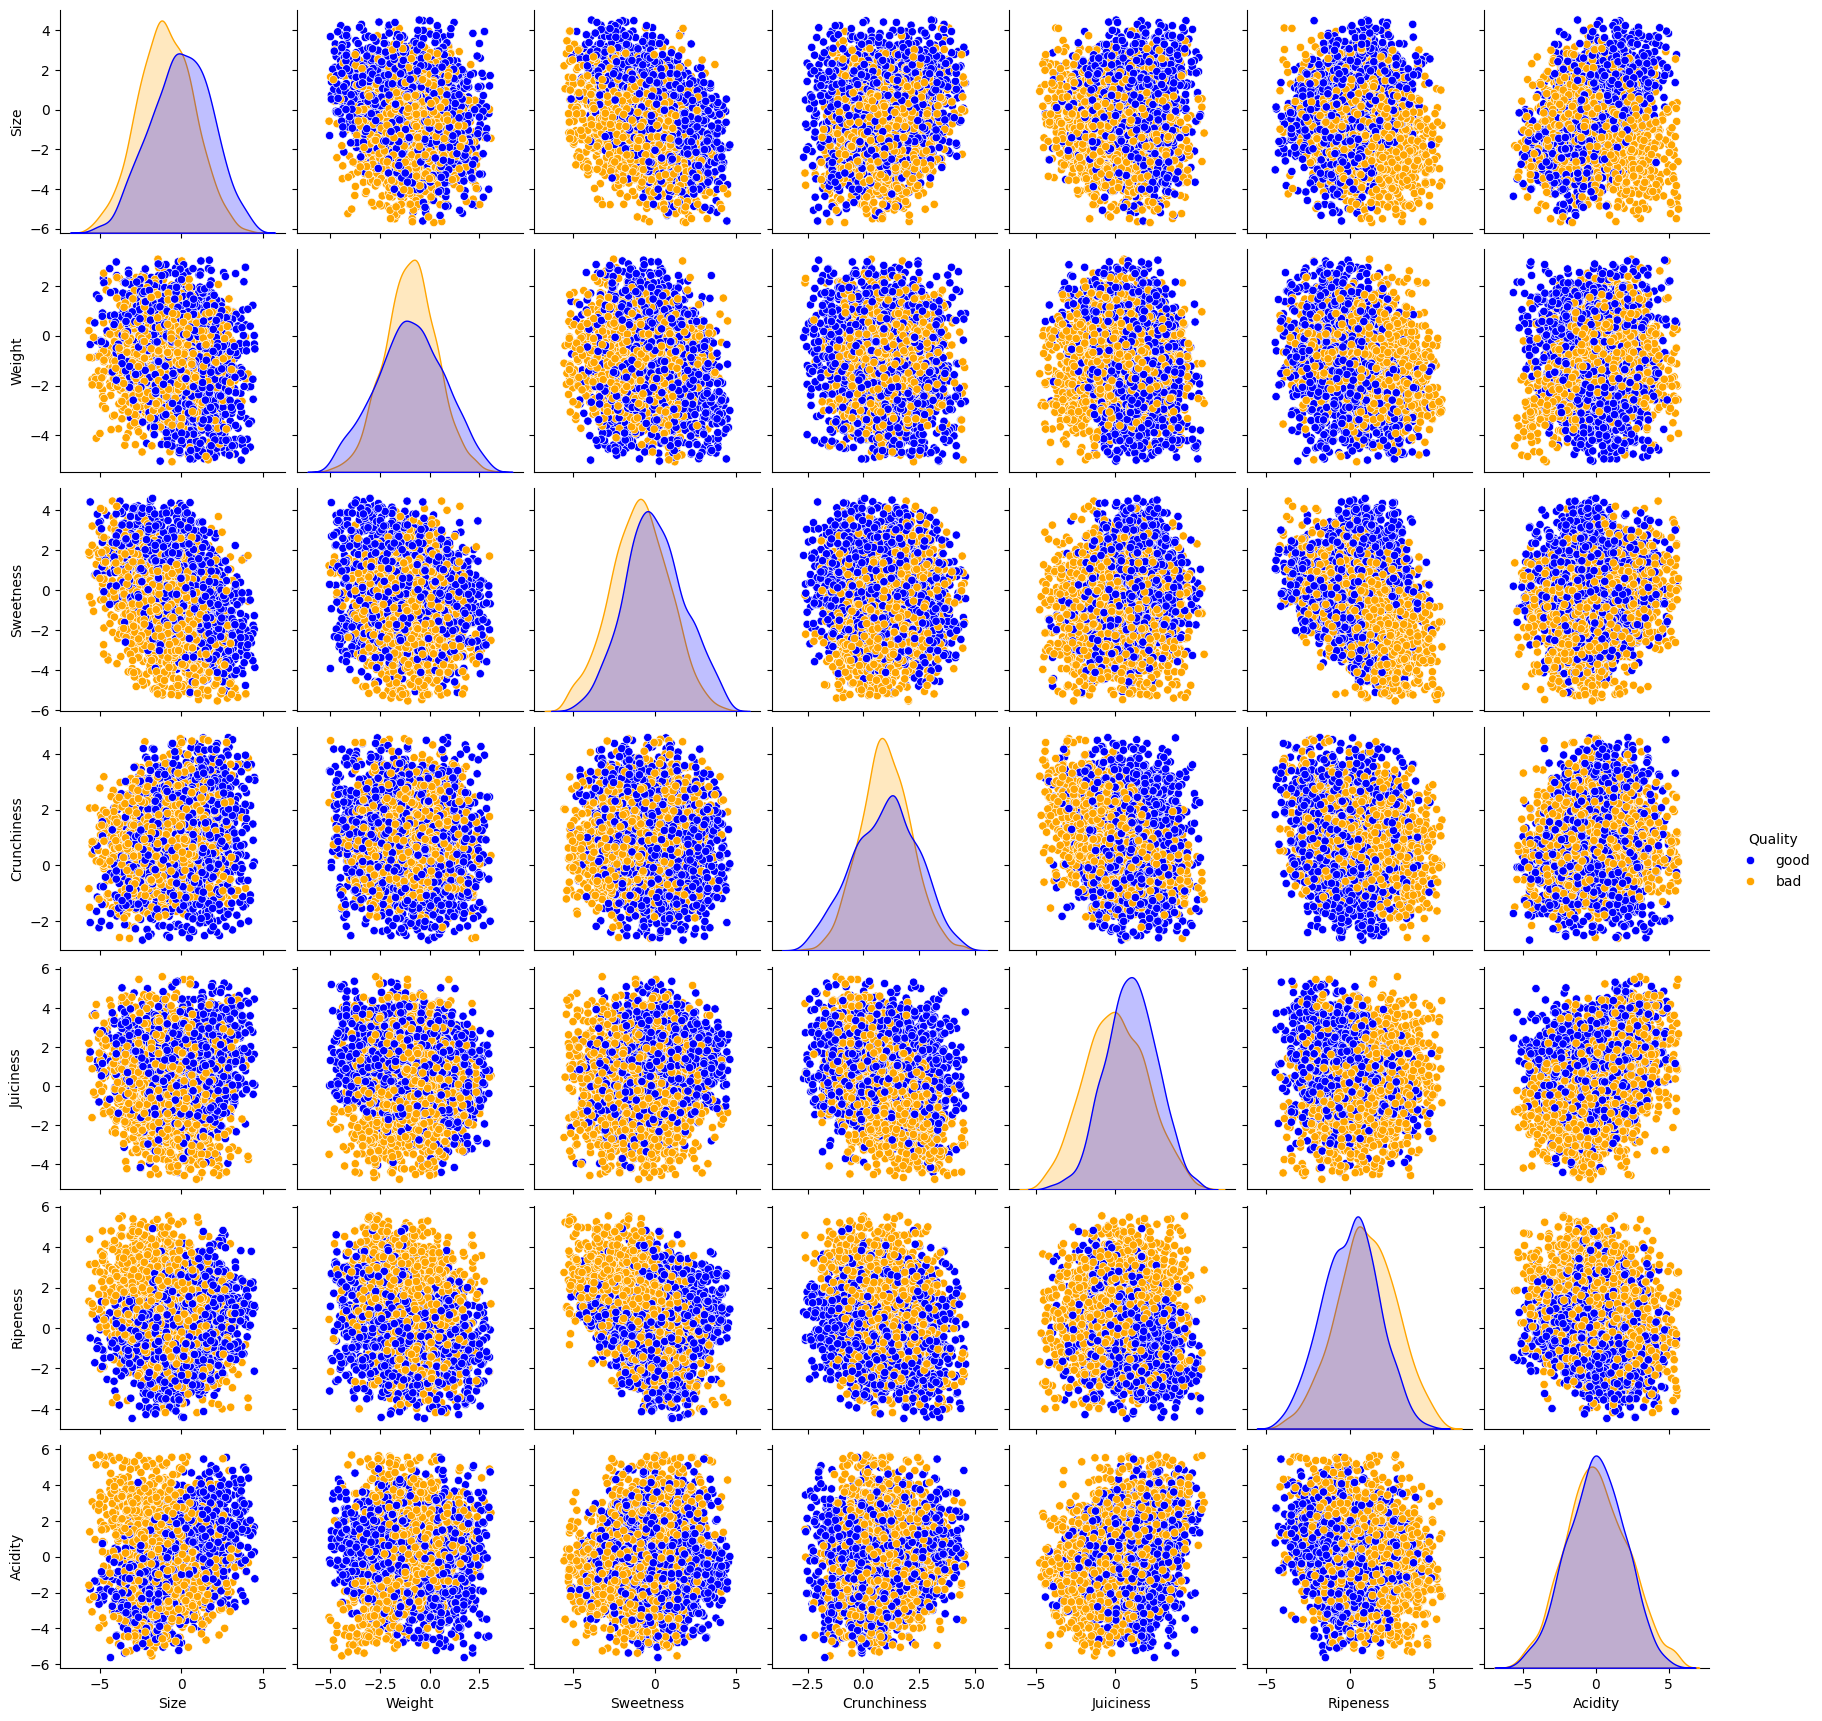

In [9]:
# drop A_id from df because it is not relevant for the pairplot
df_eda = cleaned_df.iloc[:,1:]

# visualize new dataframe
df_eda.head()


# Hue is set to quality, meaning that points in the scatterplot and histogram are color-coded by the quality
# good quality = blue, bad quality = orange
custom_colors = {
    'good': 'blue',
    'bad': 'orange'
}

sns.pairplot(data=df_eda, hue='Quality', palette=custom_colors)

plt.show()

## Correlation Matrix

Correlation Matrix
                  Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
Size         1.000000 -0.148753  -0.336019     0.172118  -0.024143 -0.157200   
Weight      -0.148753  1.000000  -0.139688    -0.095253  -0.088535 -0.229169   
Sweetness   -0.336019 -0.139688   1.000000    -0.026662   0.083877 -0.274842   
Crunchiness  0.172118 -0.095253  -0.026662     1.000000  -0.229932 -0.195414   
Juiciness   -0.024143 -0.088535   0.083877    -0.229932   1.000000 -0.100406   
Ripeness    -0.157200 -0.229169  -0.274842    -0.195414  -0.100406  1.000000   
Acidity      0.178866  0.039718   0.065070     0.074503   0.241942 -0.199588   

              Acidity  
Size         0.178866  
Weight       0.039718  
Sweetness    0.065070  
Crunchiness  0.074503  
Juiciness    0.241942  
Ripeness    -0.199588  
Acidity      1.000000  


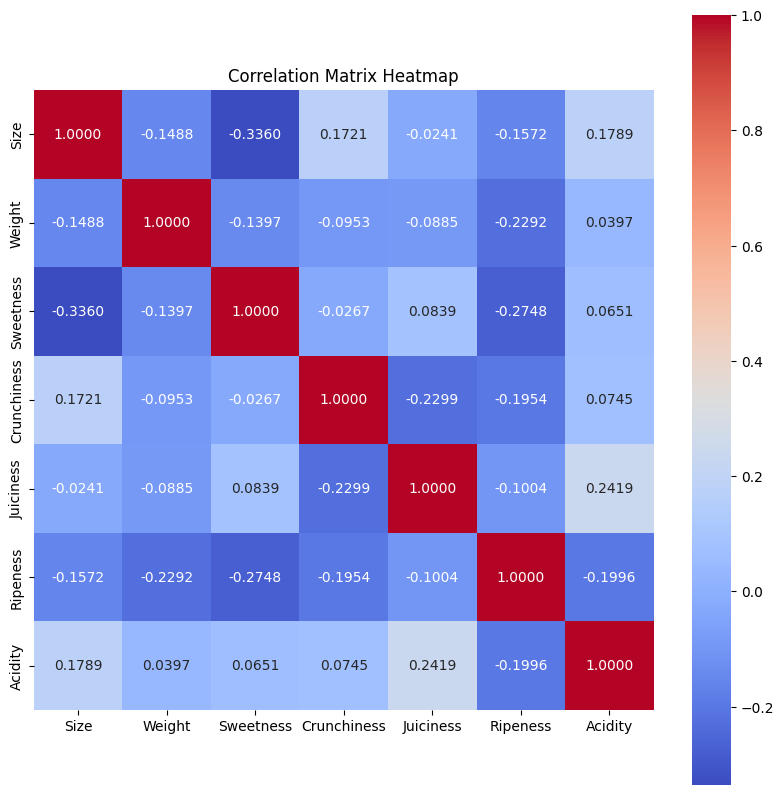

In [10]:
# select only numeric features from the dataset for the correlation matrix
corr_features = df_eda.select_dtypes(include=['int64', 'float64'])

# use pearson correlation as data is continuous and appears normally distributed
corr_matrix = corr_features.corr(method='pearson')

print("Correlation Matrix\n", corr_matrix)

# Display the heatmap with the correlations values
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cmap='coolwarm', square=True, annot = True, fmt = '.4f')
plt.title('Correlation Matrix Heatmap')
plt.show()


## Skewedness Analysis using Histograms

In [11]:
# Calculate skewness for each feature to understand the distribution shape
skewness = cleaned_df[features_to_plot].skew()
print("Skewness for each feature:\n", skewness)


Skewness for each feature:
 Size           0.003447
Weight        -0.050904
Sweetness      0.042998
Crunchiness   -0.044276
Juiciness     -0.094619
Ripeness      -0.003075
Acidity        0.046533
dtype: float64


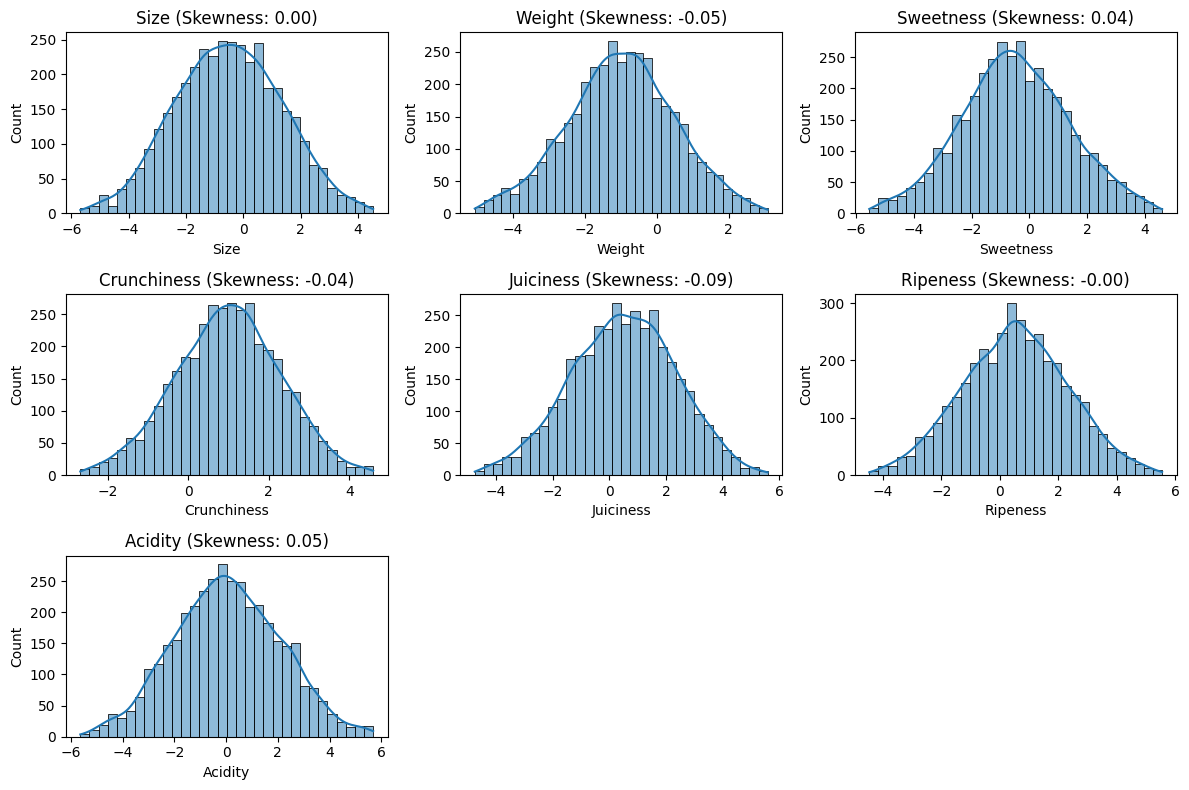

In [12]:
# Plotting skewness using histograms for better visualization
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(cleaned_df[feature], kde=True)
    plt.title(f"{feature} (Skewness: {skewness[feature]:.2f})")

plt.tight_layout()
plt.show()

## Variable Type Counts


Unique counts for each feature (number of distinct values):
 A_id           3790
Size           3790
Weight         3790
Sweetness      3790
Crunchiness    3790
Juiciness      3790
Ripeness       3790
Acidity        3790
Quality           2
dtype: int64


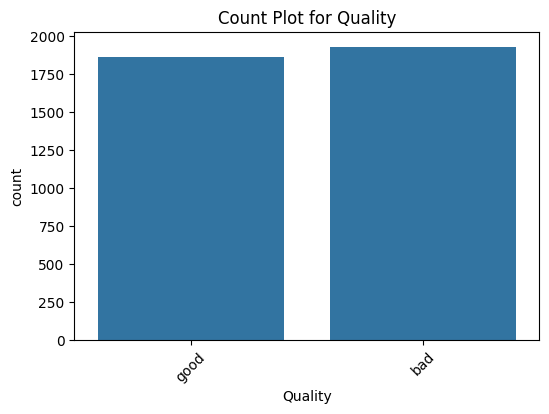

In [13]:

# Determine if there are any categorical variables, their types, and counts of unique values if applicable
unique_counts = cleaned_df.nunique()
print("\nUnique counts for each feature (number of distinct values):\n", unique_counts)

# If there are categorical features, plot their counts to see the distribution across categories
categorical_features = cleaned_df.select_dtypes(include=['object']).columns  # Identify categorical columns if any

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=cleaned_df, x=feature)
    plt.title(f"Count Plot for {feature}")
    plt.xticks(rotation=45)
    plt.show()

## Q-Q Plot

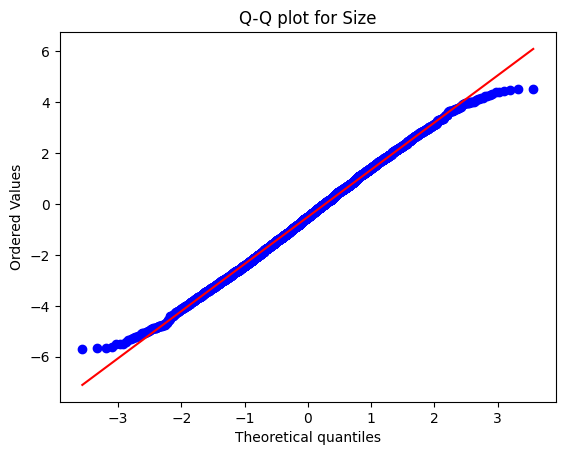

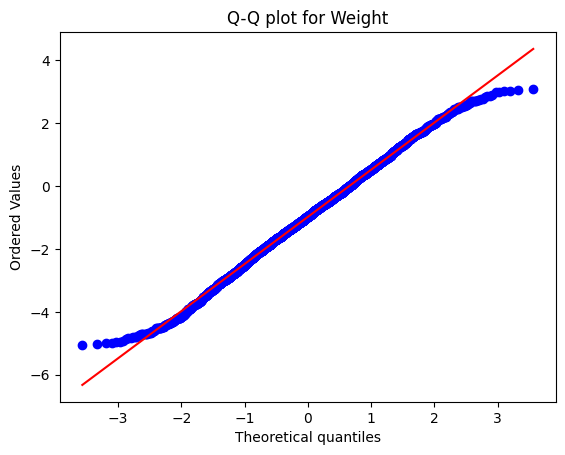

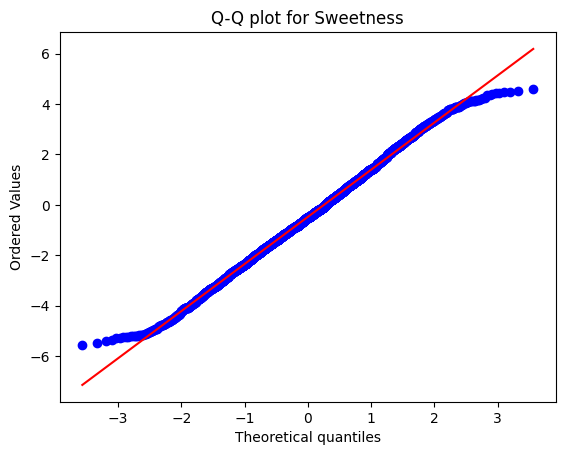

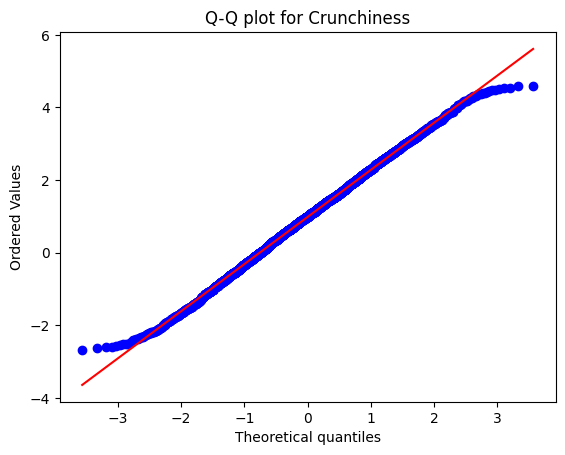

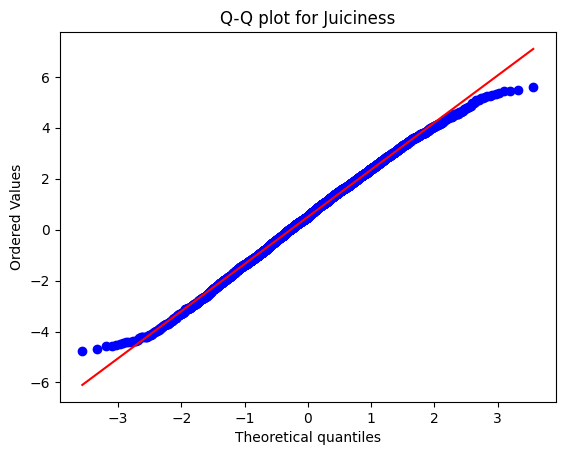

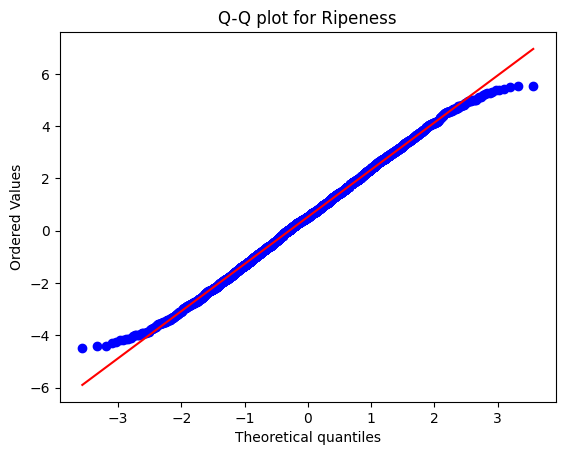

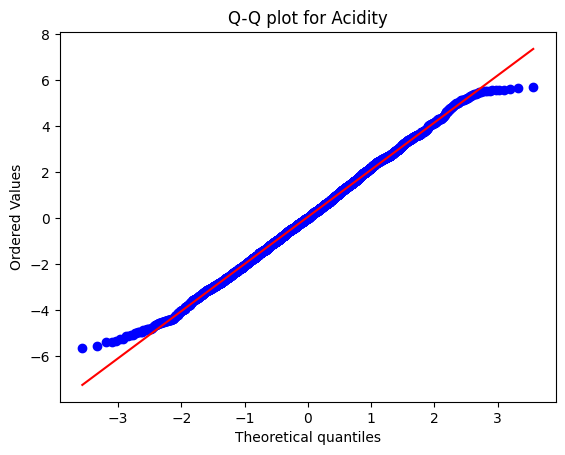

In [14]:
import scipy.stats as stats
import matplotlib.pyplot as plt

for feature in features:
    plt.figure()
    stats.probplot(cleaned_df[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {feature}')
    plt.show()

## Random Forest Model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.model_selection import GridSearchCV

RF_dataset = cleaned_df.iloc[:,1:]

X = RF_dataset.drop('Quality', axis=1)  
y = RF_dataset['Quality']  

# spliting the data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameters grid for grid search for Random Forest model
param_grid_rf = {
    'n_estimators': range(100, 500, 100),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20]
}

# Create a Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Grid Search for the best hyperparameters
grid_search_rf = GridSearchCV(estimator = random_forest, param_grid = param_grid_rf, cv = 3, scoring = 'accuracy')
grid_result_rf = grid_search_rf.fit(X_train, y_train)

# Find best random forest model
best_rf = grid_result_rf.best_estimator_

# Make predictions based on the best model
# Find evaluation metrics for accuracy, F1 score, Precision score, and Recall score
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf, pos_label = 'good', average = 'binary')
precision_score_rf = precision_score(y_test, y_pred_rf, pos_label = 'good', average = 'binary')
recall_score_rf = recall_score(y_test, y_pred_rf, pos_label = 'good', average = 'binary')

# Print results
print("Best Random Forest parameters %s:" % (grid_result_rf.best_params_))
print(f'Best Random Forest Accuracy Score: {accuracy_rf}')
print(f'Best Random Forest F1 Score: {f1_score_rf}')
print(f'Best Random Forest Precision Score: {precision_score_rf}')
print(f'Best Random Forest Recall Score: {recall_score_rf}')

# Create the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion matrix for Random Forest model:", cm_rf)


Best Random Forest parameters {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}:
Best Random Forest Accuracy Score: 0.8839050131926122
Best Random Forest F1 Score: 0.8839050131926122
Best Random Forest Precision Score: 0.8701298701298701
Best Random Forest Recall Score: 0.8981233243967829
Confusion matrix for Random Forest model: [[335  50]
 [ 38 335]]


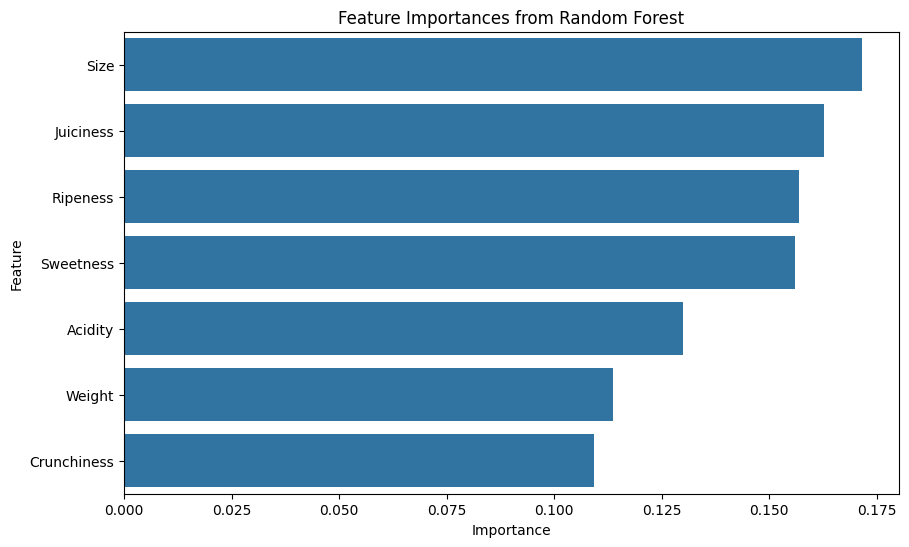

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Extract feature importances from the Random Forest model
feature_importances = random_forest.feature_importances_
features_rf = X.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({'Feature': features_rf, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

In [22]:
# svm model

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


# load in dataset

# cleaned_df.head()
print("X\n")
X = cleaned_df.iloc[:,1:-1]
print(X)

print("Y\n")
y = cleaned_df.iloc[:,[-1]]
y = y.values.ravel()
print(y)

print("dataset size: {}".format(X.shape[0]), "\n")

# Spliting the dataset into train and test sets [80:20]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize attributes of dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'kernel': ['rbf', 'poly', 'linear'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1]
}

# use grid search for optimization


# Initialize model

svm_model = SVC()

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

# get best model
best_model = grid_search.best_estimator_

acc = best_model.score(X_test, y_test)
print("highest accuracy", acc)

X

          Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
1    -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2    -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3    -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
5    -3.425400 -1.409082  -1.913511    -0.555775  -3.853071  1.914616   
...        ...       ...        ...          ...        ...       ...   
3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity  
1    -0.722809  
2     2.621636  
3     0.790723  
4     0.501984  
5    -2.981523  
...        ...  
3

In [23]:
# make prediction
y_pred = best_model.predict(X_test)

f1_score = f1_score(y_test, y_pred, pos_label='good')
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


# get more performance metrics
print("accuracy: ", accuracy)
print("confusion matrix: \n", cm)
print("f1 score: ", f1_score)

accuracy:  0.8984168865435356
confusion matrix: 
 [[349  36]
 [ 41 332]]
f1 score:  0.8960863697705803
